In [0]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 46kB/s 
     |████████████████████████████████| 501kB 56.3MB/s 
     |████████████████████████████████| 4.3MB 42.9MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


Import Tensorflow Libraries

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dropout,Dense,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
tf.__version__

'2.0.0-rc0'

Import Machine Learning Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Download Data Through Github

In [0]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Counting objects: 100% (7873/7873), done.
remote: Compressing objects: 100% (7873/7873), done.
remote: Total 7873 (delta 1), reused 7872 (delta 0), pack-reused 0
Receiving objects: 100% (7873/7873), 246.59 MiB | 54.54 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


Read Data

In [0]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
data.shape

(7254, 27)

Convert Image into Binary Format

In [0]:
img_width = 350
img_height = 350

x = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width,img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)

x = np.array(x)

100%|██████████| 7254/7254 [00:30<00:00, 210.99it/s]


In [0]:
x.shape

(7254, 350, 350, 3)

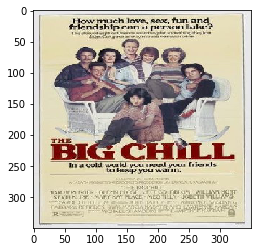

In [0]:
plt.imshow(x[11])

In [0]:
data['Genre'][11]

"['Comedy', 'Drama']"

In [0]:
x.shape

(7254, 350, 350, 3)

In [0]:
y = data.drop(['Id','Genre'], axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

Train And Test Data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=.15)

In [0]:
x_train[0].shape

(350, 350, 3)

Create CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Dense(25, activation='sigmoid'))


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

Compile Model

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 207s 34ms/sample - loss: 0.5020 - accuracy: 0.7728 - val_loss: 8.6465 - val_accuracy: 0.3453
Epoch 2/5
6165/6165 [==============================] - 192s 31ms/sample - loss: 0.2394 - accuracy: 0.9146 - val_loss: 10.4622 - val_accuracy: 0.2803
Epoch 3/5
6165/6165 [==============================] - 189s 31ms/sample - loss: 0.2292 - accuracy: 0.9150 - val_loss: 0.7606 - val_accuracy: 0.8463
Epoch 4/5
6165/6165 [==============================] - 191s 31ms/sample - loss: 0.2234 - accuracy: 0.9168 - val_loss: 0.2661 - val_accuracy: 0.9049
Epoch 5/5
6165/6165 [==============================] - 189s 31ms/sample - loss: 0.2168 - accuracy: 0.9183 - val_loss: 0.2528 - val_accuracy: 0.9093


Test Our Model With New Images

Comedy
Drama
Action


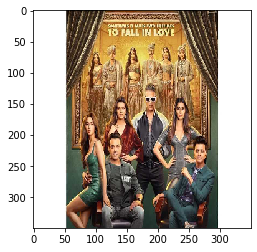

In [0]:
img = image.load_img('/content/housefull.jpg', target_size=(img_width,img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3][i])

Drama
Adventure
Sci-Fi


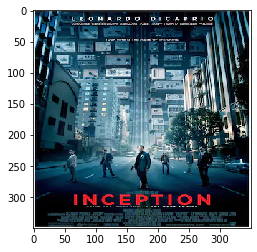

In [0]:
img = image.load_img('/content/in.jpg', target_size=(img_width,img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3][i])